ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

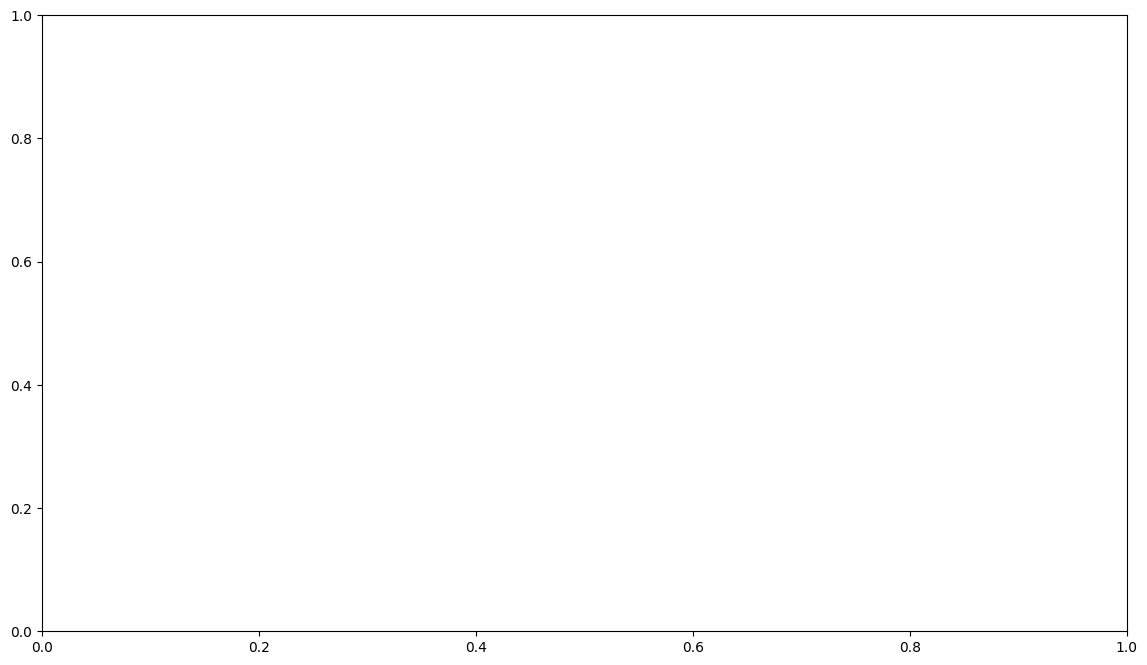

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Function to load and process the data
def load_and_process(file_path):
    data = pd.read_csv(file_path)
    
    # Convert string representation of lists into actual lists
    data['Time Steps'] = data['Time Steps'].apply(lambda x: eval(x))
    data['Gini Over Time'] = data['Gini Over Time'].apply(lambda x: eval(x))
    
    return data

# Function to plot Gini over time with confidence intervals
def plot_gini_with_ci(data, map_scheme):
    combinations = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])
    
    plt.figure(figsize=(14, 8))
    
    for (tax_scheme, distributer_scheme, tax_rate), group in combinations:
        gini_values = np.array(group['Gini Over Time'].tolist())
        time_steps = np.array(group['Time Steps'].tolist()[0])
        
        # Calculate mean and 95% confidence interval
        mean_gini = np.mean(gini_values, axis=0)
        ci = 1.96 * np.std(gini_values, axis=0) / np.sqrt(len(gini_values))
        
        label = f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}"
        plt.plot(time_steps, mean_gini, label=label)
        plt.fill_between(time_steps, (mean_gini - ci), (mean_gini + ci), alpha=0.2)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Gini Coefficient')
    plt.title(f'Average Gini Coefficient Over Time for {map_scheme}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data from the three files
file_paths = [
    'experiments_results_split.csv',
    'experiments_results_top_heavy.csv',
    'experiments_results_uniform.csv'
]

# Plot results for each file
for file_path in file_paths:
    data = load_and_process(file_path)
    map_scheme = file_path.split('_')[-1].split('.')[0]
    plot_gini_with_ci(data, map_scheme)
